## データの読み込み

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import pickle

In [33]:
df=pd.read_csv('preprocessed_data.csv')
df.head()

,カテゴリ,建物名,築年数,階数,階,賃料,管理費,敷金,礼金,間取り,専有面積,23区,都市名,路線,最寄駅,徒歩
0,賃貸アパート,プチ・ボヌール,4,2,2,148000.0,5000.0,148000.0,148000.0,42DK,48.87,大田区,南蒲田３,京急空港線,糀谷駅,7
1,賃貸一戸建て,荒川戸建,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5
2,賃貸一戸建て,荒川戸建,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5
3,賃貸マンション,ティモーネ上野の森ノース,5,11,2,152000.0,10000.0,152000.0,152000.0,2LDK,52.04,荒川区,東日暮里４,ＪＲ山手線,鶯谷駅,6
4,賃貸アパート,東京メトロ日比谷線 三ノ輪駅 3階建 築13年,13,3,3,113000.0,2000.0,113000.0,113000.0,1LDK,43.81,荒川区,南千住５,東京メトロ日比谷線,三ノ輪駅,5


In [34]:
###カテゴリカル変数に変換
df['カテゴリ']=df['カテゴリ'].astype('category') 
df['間取り']=df['間取り'].astype('category')
df['23区']=df['23区'].astype('category')
df['都市名']=df['都市名'].astype('category')
df['路線']=df['路線'].astype('category')
df['最寄駅']=df['最寄駅'].astype('category')

In [35]:
df['カテゴリ'].value_counts()

賃貸マンション         169887
賃貸アパート           49690
賃貸一戸建て            2562
賃貸テラス・タウンハウス       724
賃貸その他               60
Name: カテゴリ, dtype: int64

In [61]:
df.groupby('カテゴリ').mean()['賃料'].values

array([225225.        ,  75792.79734353, 160409.66850829, 113617.97253468,
       244396.52615144])

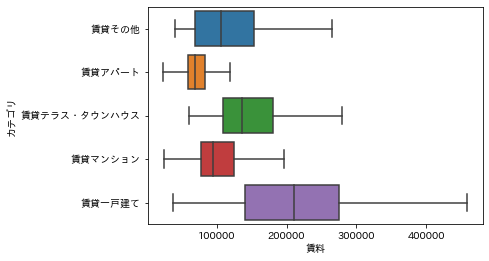

In [63]:
sns.boxplot(x='賃料',y='カテゴリ',data=df, sym='')
plt.show()

In [48]:
sns.boxplot?

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222923 entries, 0 to 222922
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   カテゴリ    222923 non-null  category
 1   建物名     222923 non-null  object  
 2   築年数     222923 non-null  int64   
 3   階数      222923 non-null  int64   
 4   階       222923 non-null  int64   
 5   賃料      222923 non-null  float64 
 6   管理費     222923 non-null  float64 
 7   敷金      222923 non-null  float64 
 8   礼金      222923 non-null  float64 
 9   間取り     222923 non-null  category
 10  専有面積    222923 non-null  float64 
 11  23区     222923 non-null  category
 12  都市名     222923 non-null  category
 13  路線      222923 non-null  category
 14  最寄駅     222923 non-null  category
 15  徒歩      222923 non-null  int64   
dtypes: category(6), float64(5), int64(4), object(1)
memory usage: 18.8+ MB


In [64]:
# df[''].unique()

In [65]:
# df2=df.copy()
# df_cate=pd.get_dummies(df[['カテゴリ', '間取り']])
# df2=pd.concat([df2, df_cate], axis=1)
# df2.head()
# # df_cate

In [66]:
# df_cate.columns

In [70]:
df.columns

Index(['カテゴリ', '建物名', '築年数', '階数', '階', '賃料', '管理費', '敷金', '礼金', '間取り', '専有面積',
       '23区', '都市名', '路線', '最寄駅', '徒歩'],
      dtype='object')

In [71]:
#目的変数と説明変数に分割
columns=['カテゴリ', '築年数', '階数', '階', '間取り', '専有面積','23区', '都市名', '路線', '最寄駅', '徒歩']
X=df[columns]
y=df['賃料']

In [68]:
#目的変数と説明変数に分割
# X=df2.drop(['建物名', '賃料'], axis=1)
# y=df2['賃料']

In [72]:
#学習用、検証用、テスト用に分割
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test=train_test_split(X, y, test_size=0.2, random_state=20221014)
X_train, X_val, y_train, y_val=train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=20221014)

In [73]:
X.columns

Index(['カテゴリ', '築年数', '階数', '階', '間取り', '専有面積', '23区', '都市名', '路線', '最寄駅',
       '徒歩'],
      dtype='object')

### 線形回帰

In [74]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error
# from sklearn.preprocessing import StandardScaler

# # feature_names=['階', '築年数', '専有面積', '徒歩','賃貸その他', '賃貸アパート', '賃貸テラス・タウンハウス', '賃貸マンション', '賃貸一戸建て']
# # feature_names=['階', '築年数', '専有面積', '徒歩','賃貸その他', '賃貸アパート', '賃貸テラス・タウンハウス', '賃貸一戸建て']
# # feature_names=['階', '築年数', '専有面積', '徒歩','賃貸その他', '賃貸テラス・タウンハウス', '賃貸マンション', '賃貸一戸建て']
# feature_names=['築年数', '階', '専有面積',
#        '徒歩', 'カテゴリ_賃貸その他', 'カテゴリ_賃貸アパート',
#        'カテゴリ_賃貸テラス・タウンハウス', 'カテゴリ_賃貸一戸建て', '間取り_12SLDK',
#        '間取り_1DK', '間取り_1K', '間取り_1LDK', '間取り_1LK', '間取り_1SDK', '間取り_1SK',
#        '間取り_1SLDK', '間取り_1SLK', '間取り_2DK', '間取り_2K', '間取り_2LDK', '間取り_2LK',
#        '間取り_2SDK', '間取り_2SK', '間取り_2SLDK', '間取り_3DK', '間取り_3K', '間取り_3LDK',
#        '間取り_3LK', '間取り_3SDK', '間取り_3SK', '間取り_3SLDK', '間取り_42DK', '間取り_4DK',
#        '間取り_4K', '間取り_4LDK', '間取り_4SDK', '間取り_4SK', '間取り_4SLDK', '間取り_5DK',
#        '間取り_5K', '間取り_5LDK', '間取り_5SDK', '間取り_5SLDK', '間取り_6DK', '間取り_6K',
#        '間取り_6LDK', '間取り_6SDK', '間取り_6SK', '間取り_6SLDK', '間取り_7DK', '間取り_7K',
#        '間取り_7LDK', '間取り_7SLDK', '間取り_8K', '間取り_ワンルーム']

# # X_linear_train=X_train[['築年数', '専有面積', '徒歩']]
# # X_linear_val=X_val[['築年数', '専有面積', '徒歩']]
# # X_linear_test=X_test[['築年数', '専有面積', '徒歩']]

# # X_linear_train=X_train[['階', '専有面積', '徒歩']]
# # X_linear_val=X_val[['階', '専有面積', '徒歩']]
# # X_linear_test=X_test[['階', '専有面積', '徒歩']]

# X_linear_train=X_train[feature_names]
# X_linear_val=X_val[feature_names]
# X_linear_test=X_test[feature_names]

# #標準化(訓練用)
# ss=StandardScaler()
# ss.fit(X_linear_train)
# X_linear_train_scaled=ss.transform(X_linear_train)
# X_linear_val_scaled=ss.transform(X_linear_val)
# X_linear_test_scaled=ss.transform(X_linear_test)

# y_linear_train=y_train
# y_linear_val=y_val
# y_linear_test=y_test


# LR=LinearRegression()
# LR.fit(X_linear_train_scaled, y_linear_train)

In [75]:
# y_pred_linear_val=LR.predict(X_linear_val_scaled)
# # y_pred_linear_val

In [76]:
# mean_absolute_error(y_true=y_linear_val, y_pred=y_pred_linear_val)

In [77]:
# LR.coef_, LR.intercept_

In [78]:
# feature_names

In [79]:
# LR.coef_

In [81]:
# plt.barh(y=feature_names, width=LR.coef_)
# plt.show()

In [82]:
# from sklearn.metrics import r2_score
# r2_score(y_true=y_linear_val, y_pred=y_pred_linear_val)

In [83]:
# plt.scatter(x=[i for i in range(len(y_linear_val))], y=y_linear_val, c='red', alpha=0.3)
# plt.scatter(x=[i for i in range(len(y_linear_val))], y=y_pred_linear_val, c='blue', alpha=0.5)

# plt.show()

In [84]:
# error=y_linear_val-y_pred_linear_val
# print(X_val.iloc[np.argmax(error)])
# print('実際の価格：',y_val.iloc[np.argmax(error)])
# print('予測価格：',y_pred_linear_val[np.argmax(error)])
# print('誤差：',max(error))

In [86]:
# X_val['間取り'].iloc[np.argmax(error)]

In [87]:
# np.argmax(error)

In [85]:
# error.sort_values()

### lightGBM

In [88]:
import lightgbm as lgb
from sklearn.metrics import r2_score

In [168]:
df.columns

Index(['カテゴリ', '建物名', '築年数', '階数', '階', '賃料', '管理費', '敷金', '礼金', '間取り', '専有面積',
       '23区', '都市名', '路線', '最寄駅', '徒歩'],
      dtype='object')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222923 entries, 0 to 222922
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   カテゴリ    222923 non-null  category
 1   建物名     222923 non-null  object  
 2   築年数     222923 non-null  int64   
 3   階数      222923 non-null  int64   
 4   階       222923 non-null  int64   
 5   賃料      222923 non-null  float64 
 6   管理費     222923 non-null  float64 
 7   敷金      222923 non-null  float64 
 8   礼金      222923 non-null  float64 
 9   間取り     222923 non-null  category
 10  専有面積    222923 non-null  float64 
 11  23区     222923 non-null  category
 12  都市名     222923 non-null  category
 13  路線      222923 non-null  category
 14  最寄駅     222923 non-null  category
 15  徒歩      222923 non-null  int64   
dtypes: category(6), float64(5), int64(4), object(1)
memory usage: 18.8+ MB


In [173]:
df['log_賃料']=np.log(df['賃料'])
df.head()

,カテゴリ,建物名,築年数,階数,階,賃料,管理費,敷金,礼金,間取り,専有面積,23区,都市名,路線,最寄駅,徒歩,log_賃料
0,賃貸アパート,プチ・ボヌール,4,2,2,148000.0,5000.0,148000.0,148000.0,42DK,48.87,大田区,南蒲田３,京急空港線,糀谷駅,7,11.904968
1,賃貸一戸建て,荒川戸建,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5,12.180755
2,賃貸一戸建て,荒川戸建,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5,12.180755
3,賃貸マンション,ティモーネ上野の森ノース,5,11,2,152000.0,10000.0,152000.0,152000.0,2LDK,52.04,荒川区,東日暮里４,ＪＲ山手線,鶯谷駅,6,11.931636
4,賃貸アパート,東京メトロ日比谷線 三ノ輪駅 3階建 築13年,13,3,3,113000.0,2000.0,113000.0,113000.0,1LDK,43.81,荒川区,南千住５,東京メトロ日比谷線,三ノ輪駅,5,11.635143


In [181]:
#目的変数と説明変数に分割
# drop_columns=['カテゴリ', '建物名', '築年数', '階数', '階', '賃料', '管理費', '敷金', '礼金', '間取り', '専有面積','23区', '都市名', '路線', '最寄駅', '徒歩']
columns=['カテゴリ', '築年数', '階数', '階', '管理費', '敷金', '礼金', '間取り', '専有面積','23区', '都市名', '路線', '最寄駅', '徒歩']

X=df[columns]
y=df['log_賃料']


In [182]:
#学習用、検証用、テスト用に分割
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train_val, X_test, y_train_val, y_test=train_test_split(X, y, test_size=0.2, random_state=20221014)
X_train, X_val, y_train, y_val=train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=20221014)

In [186]:
# lgb_reg=lgb.LGBMRegressor()
train_sets=lgb.Dataset(X_train, y_train)
eval_sets=lgb.Dataset(X_val, y_val)
params={
 'objective': 'regression_l1',
 'metric': 'l1',
 'verbosity': -1,
 'n_jobs': -1,
 'feature_pre_filter': False,
 'lambda_l1': 5.118671429810247,
 'lambda_l2': 7.454192125357557e-06,
 'num_leaves': 253,
 'feature_fraction': 0.516,
 'bagging_fraction': 0.8933105005420345,
 'bagging_freq': 6,
 'min_child_samples': 25,
 'num_iterations': 10000,
 'early_stopping_round': 100,
 #'categorical_column': [2, 3, 4, 6, 9, 10, 11, 12, 16],
 'learning_rate': 0.03,
 'random_state': 42
}

lgb_model=lgb.train(params, train_sets, valid_sets=[train_sets,eval_sets], num_boost_round=10000, early_stopping_rounds=100, verbose_eval=10)

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-

Training until validation scores don't improve for 100 rounds
[10]	training's l1: 0.255914	valid_1's l1: 0.25481
[20]	training's l1: 0.204459	valid_1's l1: 0.20371
[30]	training's l1: 0.166444	valid_1's l1: 0.166088
[40]	training's l1: 0.136989	valid_1's l1: 0.136976
[50]	training's l1: 0.115327	valid_1's l1: 0.115684
[60]	training's l1: 0.0973504	valid_1's l1: 0.0981024
[70]	training's l1: 0.0830887	valid_1's l1: 0.0841212
[80]	training's l1: 0.0727606	valid_1's l1: 0.0740322
[90]	training's l1: 0.0653459	valid_1's l1: 0.0668426
[100]	training's l1: 0.0584652	valid_1's l1: 0.0601494
[110]	training's l1: 0.0531802	valid_1's l1: 0.0551124
[120]	training's l1: 0.0494736	valid_1's l1: 0.0516053
[130]	training's l1: 0.0464404	valid_1's l1: 0.0488074
[140]	training's l1: 0.0440348	valid_1's l1: 0.0465758
[150]	training's l1: 0.041961	valid_1's l1: 0.0446837
[160]	training's l1: 0.0399926	valid_1's l1: 0.0429046
[170]	training's l1: 0.0385297	valid_1's l1: 0.0416095
[180]	training's l1: 0.03

[1490]	training's l1: 0.0218294	valid_1's l1: 0.0277104
[1500]	training's l1: 0.0218029	valid_1's l1: 0.0276886
[1510]	training's l1: 0.0217804	valid_1's l1: 0.0276711
[1520]	training's l1: 0.0217609	valid_1's l1: 0.0276566
[1530]	training's l1: 0.0217386	valid_1's l1: 0.0276401
[1540]	training's l1: 0.0217086	valid_1's l1: 0.0276151
[1550]	training's l1: 0.0216772	valid_1's l1: 0.0275896
[1560]	training's l1: 0.0216529	valid_1's l1: 0.0275706
[1570]	training's l1: 0.0216262	valid_1's l1: 0.0275508
[1580]	training's l1: 0.0215953	valid_1's l1: 0.0275265
[1590]	training's l1: 0.0215768	valid_1's l1: 0.0275123
[1600]	training's l1: 0.0215536	valid_1's l1: 0.0274933
[1610]	training's l1: 0.021525	valid_1's l1: 0.0274677
[1620]	training's l1: 0.0215065	valid_1's l1: 0.0274548
[1630]	training's l1: 0.0214884	valid_1's l1: 0.0274409
[1640]	training's l1: 0.0214651	valid_1's l1: 0.0274234
[1650]	training's l1: 0.0214406	valid_1's l1: 0.0274023
[1660]	training's l1: 0.021422	valid_1's l1: 0.02

[2960]	training's l1: 0.0194814	valid_1's l1: 0.0258823
[2970]	training's l1: 0.019469	valid_1's l1: 0.0258725
[2980]	training's l1: 0.0194567	valid_1's l1: 0.0258631
[2990]	training's l1: 0.0194464	valid_1's l1: 0.025855
[3000]	training's l1: 0.0194353	valid_1's l1: 0.0258459
[3010]	training's l1: 0.0194238	valid_1's l1: 0.0258375
[3020]	training's l1: 0.0194161	valid_1's l1: 0.0258322
[3030]	training's l1: 0.0194031	valid_1's l1: 0.0258232
[3040]	training's l1: 0.0193951	valid_1's l1: 0.0258179
[3050]	training's l1: 0.0193873	valid_1's l1: 0.0258111
[3060]	training's l1: 0.0193793	valid_1's l1: 0.0258051
[3070]	training's l1: 0.0193711	valid_1's l1: 0.0257979
[3080]	training's l1: 0.0193604	valid_1's l1: 0.025791
[3090]	training's l1: 0.0193455	valid_1's l1: 0.0257792
[3100]	training's l1: 0.0193336	valid_1's l1: 0.0257698
[3110]	training's l1: 0.0193235	valid_1's l1: 0.0257618
[3120]	training's l1: 0.0193165	valid_1's l1: 0.0257569
[3130]	training's l1: 0.019306	valid_1's l1: 0.0257

[4430]	training's l1: 0.0182613	valid_1's l1: 0.0249489
[4440]	training's l1: 0.0182546	valid_1's l1: 0.0249442
[4450]	training's l1: 0.018249	valid_1's l1: 0.0249403
[4460]	training's l1: 0.0182436	valid_1's l1: 0.0249365
[4470]	training's l1: 0.0182387	valid_1's l1: 0.0249331
[4480]	training's l1: 0.0182325	valid_1's l1: 0.0249271
[4490]	training's l1: 0.0182266	valid_1's l1: 0.0249226
[4500]	training's l1: 0.0182192	valid_1's l1: 0.0249167
[4510]	training's l1: 0.0182127	valid_1's l1: 0.024911
[4520]	training's l1: 0.0182065	valid_1's l1: 0.024906
[4530]	training's l1: 0.0182014	valid_1's l1: 0.024902
[4540]	training's l1: 0.0181951	valid_1's l1: 0.0248972
[4550]	training's l1: 0.0181898	valid_1's l1: 0.0248931
[4560]	training's l1: 0.0181836	valid_1's l1: 0.0248886
[4570]	training's l1: 0.0181774	valid_1's l1: 0.0248838
[4580]	training's l1: 0.018172	valid_1's l1: 0.0248799
[4590]	training's l1: 0.0181653	valid_1's l1: 0.0248744
[4600]	training's l1: 0.0181594	valid_1's l1: 0.02487

[5900]	training's l1: 0.0175087	valid_1's l1: 0.0243784
[5910]	training's l1: 0.0175042	valid_1's l1: 0.0243749
[5920]	training's l1: 0.0175003	valid_1's l1: 0.0243719
[5930]	training's l1: 0.0174956	valid_1's l1: 0.0243678
[5940]	training's l1: 0.0174913	valid_1's l1: 0.0243644
[5950]	training's l1: 0.0174872	valid_1's l1: 0.0243616
[5960]	training's l1: 0.0174815	valid_1's l1: 0.0243583
[5970]	training's l1: 0.017476	valid_1's l1: 0.0243552
[5980]	training's l1: 0.0174699	valid_1's l1: 0.0243502
[5990]	training's l1: 0.0174642	valid_1's l1: 0.0243454
[6000]	training's l1: 0.0174603	valid_1's l1: 0.0243427
[6010]	training's l1: 0.0174551	valid_1's l1: 0.0243385
[6020]	training's l1: 0.0174501	valid_1's l1: 0.0243345
[6030]	training's l1: 0.0174444	valid_1's l1: 0.0243301
[6040]	training's l1: 0.0174391	valid_1's l1: 0.0243254
[6050]	training's l1: 0.017434	valid_1's l1: 0.0243221
[6060]	training's l1: 0.017429	valid_1's l1: 0.0243188
[6070]	training's l1: 0.0174241	valid_1's l1: 0.024

[7370]	training's l1: 0.0169543	valid_1's l1: 0.0239612
[7380]	training's l1: 0.0169513	valid_1's l1: 0.0239592
[7390]	training's l1: 0.0169471	valid_1's l1: 0.0239554
[7400]	training's l1: 0.016943	valid_1's l1: 0.0239525
[7410]	training's l1: 0.0169405	valid_1's l1: 0.0239508
[7420]	training's l1: 0.0169372	valid_1's l1: 0.0239477
[7430]	training's l1: 0.0169339	valid_1's l1: 0.0239455
[7440]	training's l1: 0.0169315	valid_1's l1: 0.0239438
[7450]	training's l1: 0.0169272	valid_1's l1: 0.0239406
[7460]	training's l1: 0.0169242	valid_1's l1: 0.0239386
[7470]	training's l1: 0.0169209	valid_1's l1: 0.0239359
[7480]	training's l1: 0.016918	valid_1's l1: 0.0239336
[7490]	training's l1: 0.0169143	valid_1's l1: 0.0239307
[7500]	training's l1: 0.0169112	valid_1's l1: 0.0239287
[7510]	training's l1: 0.0169079	valid_1's l1: 0.0239264
[7520]	training's l1: 0.0169044	valid_1's l1: 0.0239237
[7530]	training's l1: 0.0169022	valid_1's l1: 0.0239219
[7540]	training's l1: 0.0168987	valid_1's l1: 0.02

[8840]	training's l1: 0.0165155	valid_1's l1: 0.0236304
[8850]	training's l1: 0.0165133	valid_1's l1: 0.0236291
[8860]	training's l1: 0.0165112	valid_1's l1: 0.0236273
[8870]	training's l1: 0.0165089	valid_1's l1: 0.0236257
[8880]	training's l1: 0.0165062	valid_1's l1: 0.0236233
[8890]	training's l1: 0.0165042	valid_1's l1: 0.0236217
[8900]	training's l1: 0.0165007	valid_1's l1: 0.0236187
[8910]	training's l1: 0.0164987	valid_1's l1: 0.0236174
[8920]	training's l1: 0.0164961	valid_1's l1: 0.0236154
[8930]	training's l1: 0.0164939	valid_1's l1: 0.0236139
[8940]	training's l1: 0.0164916	valid_1's l1: 0.0236124
[8950]	training's l1: 0.0164887	valid_1's l1: 0.0236101
[8960]	training's l1: 0.0164856	valid_1's l1: 0.0236077
[8970]	training's l1: 0.0164827	valid_1's l1: 0.0236052
[8980]	training's l1: 0.0164804	valid_1's l1: 0.0236032
[8990]	training's l1: 0.0164784	valid_1's l1: 0.0236018
[9000]	training's l1: 0.0164764	valid_1's l1: 0.0236007
[9010]	training's l1: 0.016473	valid_1's l1: 0.0

平均絶対誤差： 0.02324911837692779


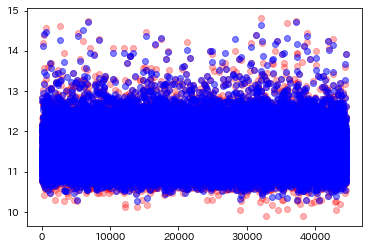

In [187]:
#テスト用
y_pred_lgb_test=lgb_model.predict(X_test)

plt.scatter(x=[i for i in range(len(y_test))], y=y_test, c='red', alpha=0.3)
plt.scatter(x=[i for i in range(len(y_test))], y=y_pred_lgb_test, c='blue', alpha=0.5)
# plt.savefig('error_plot_test_lgb_log.png')
print("平均絶対誤差：", mean_absolute_error(y_true=y_test, y_pred=y_pred_lgb_test))
plt.show()

In [190]:
np.exp(0.02324911837692779)
np.exp(11)

59874.14171519782

array([ 74660.14515639,  66999.44329566, 191167.80650784, ...,
        66993.2795179 ,  80760.08677516,  64065.43160785])

In [197]:
np.mean(np.abs(np.exp(y_test)-np.exp(y_pred_lgb_test)))

2787.31391778407

In [ ]:
file = 'Optuna_lgb.pkl'
pickle.dump(lgb_model, open(file, 'wb'))

In [161]:
#外れ値
error_test=np.abs(y_test1-y_pred_lgb_test)
error_test.sort_values(ascending=False)

12123     1.021429e+06
211891    9.871339e+05
79127     8.927689e+05
79126     8.902070e+05
193732    8.022043e+05
              ...     
59867     4.572910e-03
59953     4.572910e-03
59871     4.572910e-03
59946     4.572910e-03
60769     3.254035e-03
Name: 賃料, Length: 44585, dtype: float64

In [152]:
#外れ値除去
X_test1=X_test.copy()
X_test1['賃料']=y_test
X_test1['誤差']=error_test
X_test1[X_test1['誤差']<10000]
y_test1=X_test1['賃料']
X_test1=X_test1.drop(['賃料','誤差'], axis=1)
print(X_test1.shape)
print(y_test1.shape)

(44585, 14)
(44585,)


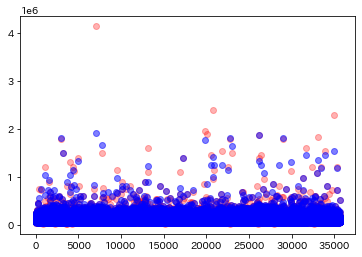

In [110]:
#検証用
y_pred_lgb_val=lgb_model.predict(X_val)

plt.scatter(x=[i for i in range(len(y_val))], y=y_val, c='red', alpha=0.3)
plt.scatter(x=[i for i in range(len(y_val))], y=y_pred_lgb_val, c='blue', alpha=0.5)
plt.savefig('error_plot_valid_lgb.png')

plt.show()

In [113]:
#外れ値
error_val=np.abs(y_val-y_pred_lgb_val)
error_val.sort_values(ascending=False)[:10]

192184    2.225567e+06
9848      1.058386e+06
212063    9.871339e+05
53400     7.688071e+05
164803    7.127629e+05
36364     6.311367e+05
177973    4.749074e+05
211082    4.560224e+05
80869     3.649173e+05
192178    3.631401e+05
Name: 賃料, dtype: float64

In [153]:
#外れ値除去
X_val1=X_val.copy()
X_val1['賃料']=y_val
X_val1['誤差']=error_val
X_val1[X_val1['誤差']<10000]
y_val1=X_val1['賃料']
X_val1=X_val1.drop(['賃料','誤差'], axis=1)

print(X_val1.shape)
print(y_val1.shape)

(35668, 14)
(35668,)


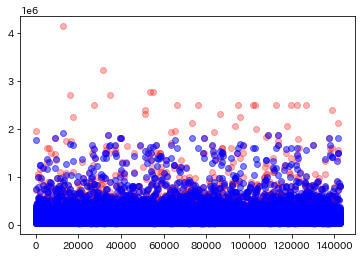

In [111]:
#訓練用
y_pred_lgb_train=lgb_model.predict(X_train)

plt.scatter(x=[i for i in range(len(y_train))], y=y_train, c='red', alpha=0.3)
plt.scatter(x=[i for i in range(len(y_train))], y=y_pred_lgb_train, c='blue', alpha=0.5)
plt.savefig('error_plot_train_lgb.png')

plt.show()

In [115]:
#外れ値
error_train=np.abs(y_train-y_pred_lgb_train)
error_train.sort_values(ascending=False)[:10]

192159    2.225567e+06
3558      1.910707e+06
35503     1.910707e+06
133757    1.825252e+06
204518    1.147861e+06
199127    1.147861e+06
12122     1.044791e+06
78188     1.021630e+06
204125    9.834614e+05
204126    9.834614e+05
Name: 賃料, dtype: float64

In [154]:
#外れ値除去
X_train1=X_train.copy()
X_train1['賃料']=y_train
X_train1['誤差']=error_train
X_train1[X_train1['誤差']<10000]
y_train1=X_train1['賃料']
X_train1=X_train1.drop(['賃料','誤差'], axis=1)

print(X_train1.shape)
print(y_train1.shape)

(142670, 14)
(142670,)


In [188]:
r2_score(y_pred=y_pred_lgb_test, y_true=y_test)

0.9868797954715904

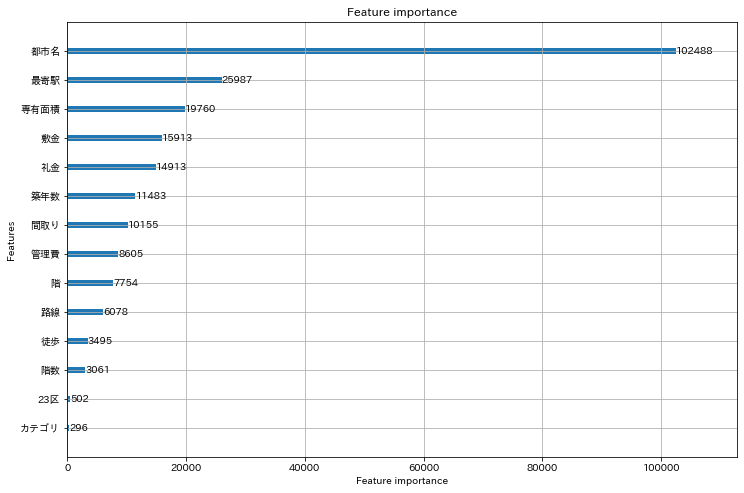

In [179]:
lgb.plot_importance(lgb_model, figsize=(12,8))
plt.savefig('f_i_lgb_default.png')
plt.show()

In [104]:
max_error_index=np.argmax(np.abs(y_test-y_pred_lgb_test))
max_error_index

32056

In [105]:
print(X_test.iloc[max_error_index])
true=y_test.iloc[max_error_index]
pred=y_pred_lgb_test[max_error_index]

print("実際：", true)
print("予測：", pred)
print("誤差：", true-pred)

カテゴリ       賃貸マンション
築年数             15
階数               4
階                2
管理費            0.0
敷金      10800000.0
礼金             0.0
間取り           4LDK
専有面積        305.84
23区            渋谷区
都市名         代々木神園町
路線       東京メトロ千代田線
最寄駅         代々木公園駅
徒歩               8
Name: 12123, dtype: object
実際： 2700000.0
予測： 1678570.8026586585
誤差： 1021429.1973413415


In [109]:
error=np.abs(y_test-y_pred_lgb_test)
error.sort_values(ascending=False)[:10]

12123     1.021429e+06
211891    9.871339e+05
79127     8.927689e+05
79126     8.902070e+05
193732    8.022043e+05
130698    7.271290e+05
196465    5.465459e+05
123682    4.964010e+05
90923     4.860769e+05
139856    3.757438e+05
Name: 賃料, dtype: float64